In [26]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy
import modules.Utility as util


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 8836
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size
initial_positions=[]
line_n = int(np.sqrt(n_particles))
start_inset = box_size/(line_n+1)
for x in np.linspace(start_inset, box_size - start_inset, line_n, True):
    for y in np.linspace(start_inset, box_size - start_inset, line_n, True):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
    
point = 500
charge = 1
initial_particles.append(Particle(np.array([point,point]), charge))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analytic Potential Graph

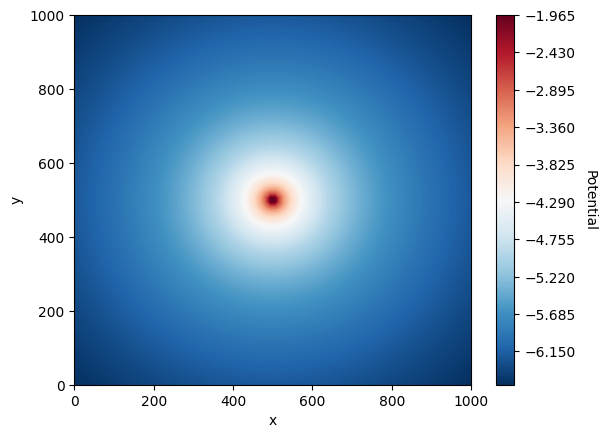

In [27]:
analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

## FMM Potential Graph

In [28]:
# FMM Simulation
expansion_order = 10
n_levels = 5
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, fmm_particles, n_levels, p=expansion_order)
fmm_results = fmm_simulation.run(plotting = True, z_range = [None,0], x_range=[0,box_size], y_range=[0,box_size], z_levels=10000)

1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
coarse level:  0
3
local expansion level:  1
local expansion level:  2
local expansion level:  3
local expansion level:  4
local expansion level:  5
4
5


## Multipole Expansion About a Specified Meshbox
This is then also compared to the analytic result

Expected radius of convergence (at lowest level, for higher levels, should add z_0 as well) 176.7766952966369


/Users/thomashartigan/Documents/Uni/part II/Computing_Project/.computing_project_venv/lib/python3.11/site-packages/matplotlib/contour.py:1234: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg, np.float64)
/var/folders/kx/94yhyxhd7fz53_m_dcz_84nr0000gn/T/ipykernel_2261/1090206099.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  test_results = util.calc_potential_results(test_particles, fig = point_test_fig, ax = point_test_axs[0,1], z_range=[np.float64(analytic_results.min), 0], title = "MPE Result")
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Utility.py:41: RuntimeWarning: invalid value encountered in divide
  log_rel_errors = np.log10(np.abs(np.array(potential_differences) / np.array(reference_potentials)))


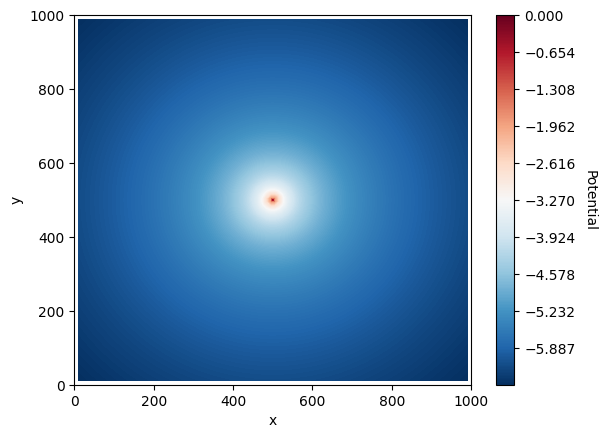

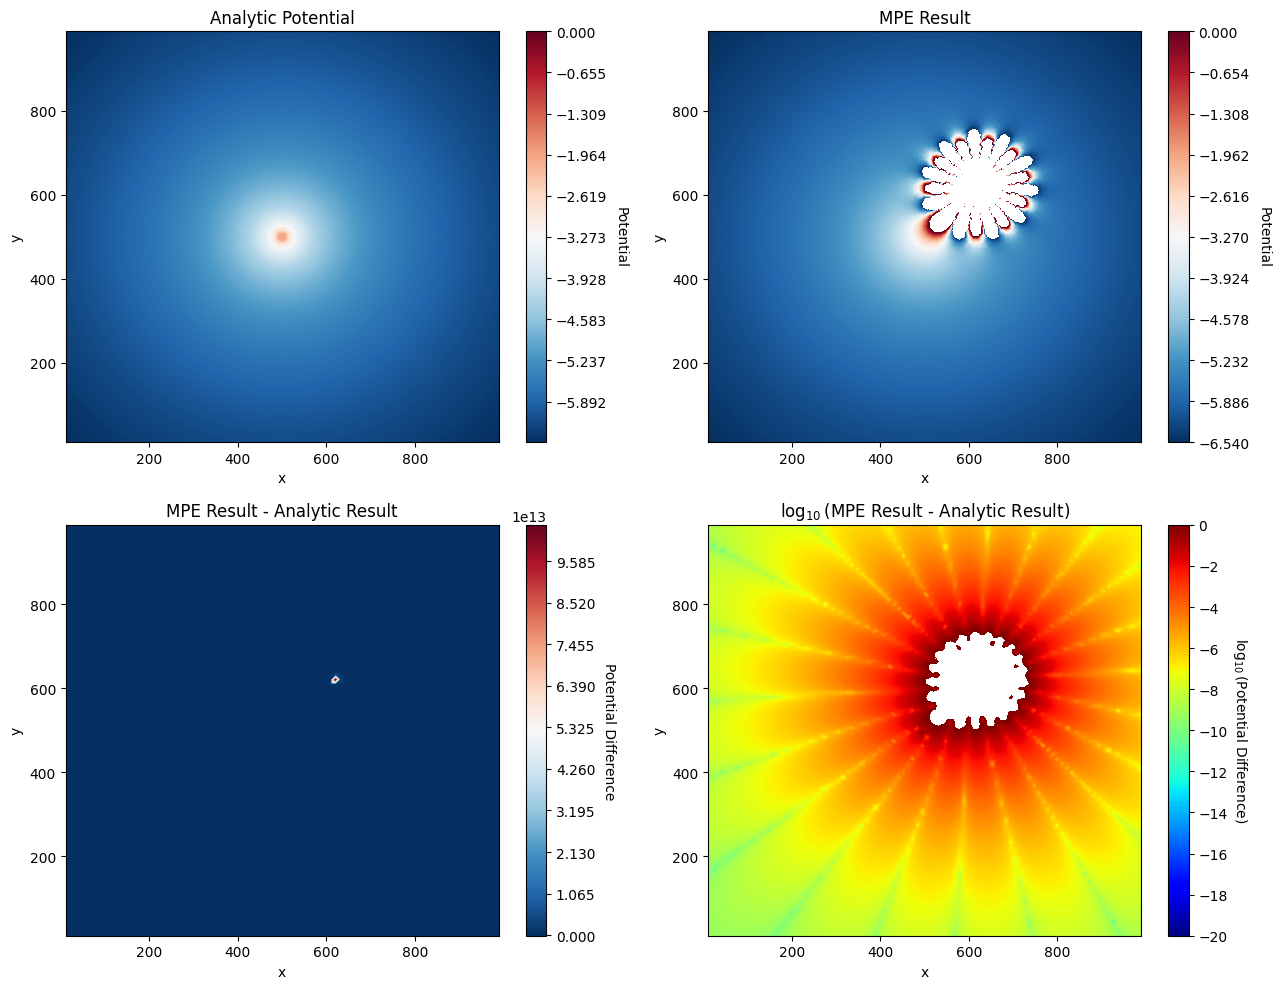

In [29]:
# test_positions = initial_positions

# test_particles = []
# for test_position in test_positions:
#     test_particles.append(Particle(test_position, 0))
test_particles = copy.deepcopy(initial_particles)
test_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
r = test_meshbox.width * np.sqrt(2)/2 #(box_size / int(np.sqrt(n_particles))) * (2**(test_meshbox.mesh.n_levels-test_meshbox.level))*np.sqrt(2)
print("Expected radius of convergence (at lowest level, for higher levels, should add z_0 as well)", r)
point_test = PointTesting(test_particles, test_meshbox, r)
point_test.test_mpe()
point_test_fig, point_test_axs = plt.subplots(2,2)
analytic_results = util.calc_potential_results(analytic_particles, fig = point_test_fig, ax = point_test_axs[0,0], z_range=[None,0], title="Analytic Potential")
test_results = util.calc_potential_results(test_particles, fig = point_test_fig, ax = point_test_axs[0,1], z_range=[np.float64(analytic_results.min), 0], title = "MPE Result")
test_analytic_diff_results = util.calc_difference_results(test_particles, analytic_particles, fig = point_test_fig, ax = point_test_axs[1,0], z_range=[None, None], title = "MPE Result - Analytic Result")
log_test_analytic_diff_results = util.calc_log_relative_error_results(test_particles, analytic_particles, fig = point_test_fig, ax = point_test_axs[1,1], z_range=[-20,0], title = r"$\log_{10}(\text{MPE Result - Analytic Result})$")
point_test_fig.set_size_inches(13,10)
point_test_fig.tight_layout()


-5.382024341996948997


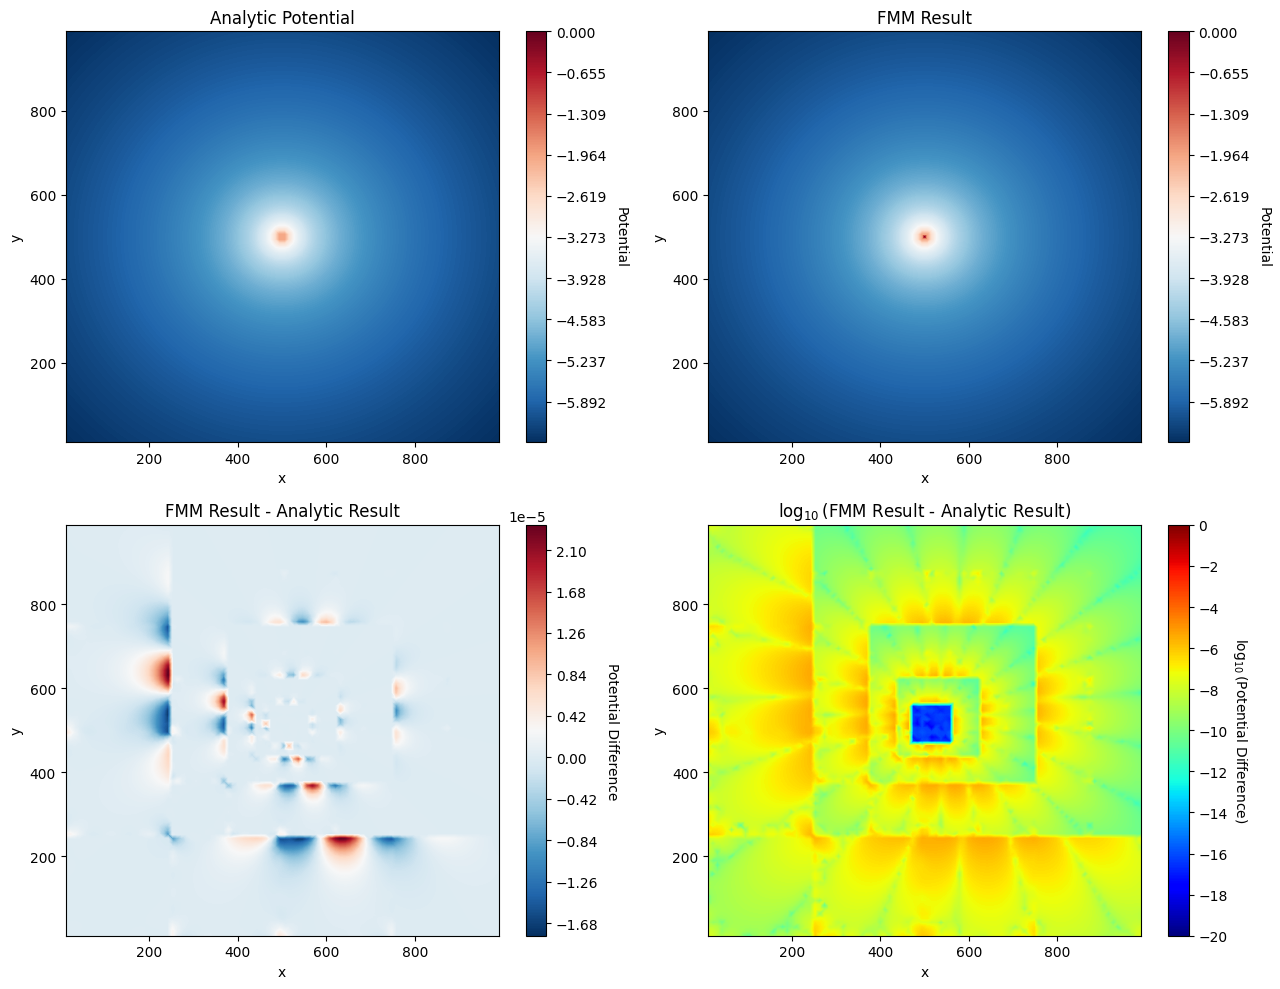

In [30]:
fmm_fig, fmm_axs = plt.subplots(2,2)
analytic_results = util.calc_potential_results(analytic_particles, fig = fmm_fig, ax = fmm_axs[0,0], z_range=[None,0], title="Analytic Potential")
fmm_results = util.calc_potential_results(fmm_particles, fig = fmm_fig, ax = fmm_axs[0,1], z_range=[None, 0], title = "FMM Result")
fmm_analytic_diff_results = util.calc_difference_results(fmm_particles, analytic_particles, fig = fmm_fig, ax = fmm_axs[1,0], z_range=[None, None], title = "FMM Result - Analytic Result")
log_fmm_analytic_diff_results = util.calc_log_relative_error_results(fmm_particles, analytic_particles, fig = fmm_fig, ax = fmm_axs[1,1], z_range=[-20,0], title = r"$\log_{10}(\text{FMM Result - Analytic Result})$")
fmm_fig.set_size_inches(13,10)
fmm_fig.tight_layout()
print(log_fmm_analytic_diff_results.max)

p= 0
1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
coarse level:  0
3
local expansion level:  1
local expansion level:  2
local expansion level:  3
local expansion level:  4
local expansion level:  5
4
5
p= 1
1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
coarse level:  0
3
local expansion level:  1
local expansion level:  2
local expansion level:  3
local expansion level:  4
local expansion level:  5
4
5
p= 4
1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
coarse level:  0
3
local expansion level:  1
local expansion level:  2
local expansion level:  3
local expansion level:  4
local expansion level:  5
4
5
p= 7
1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
coarse level:  0
3
local expansion level:  1
local expansion level:  2
local expansion level:  3
local expansion level:  4
local expansion level:  5
4
5
p= 10
1
2
coarse level:  4
coarse level:  3
coarse level:  2
coarse level:  1
co

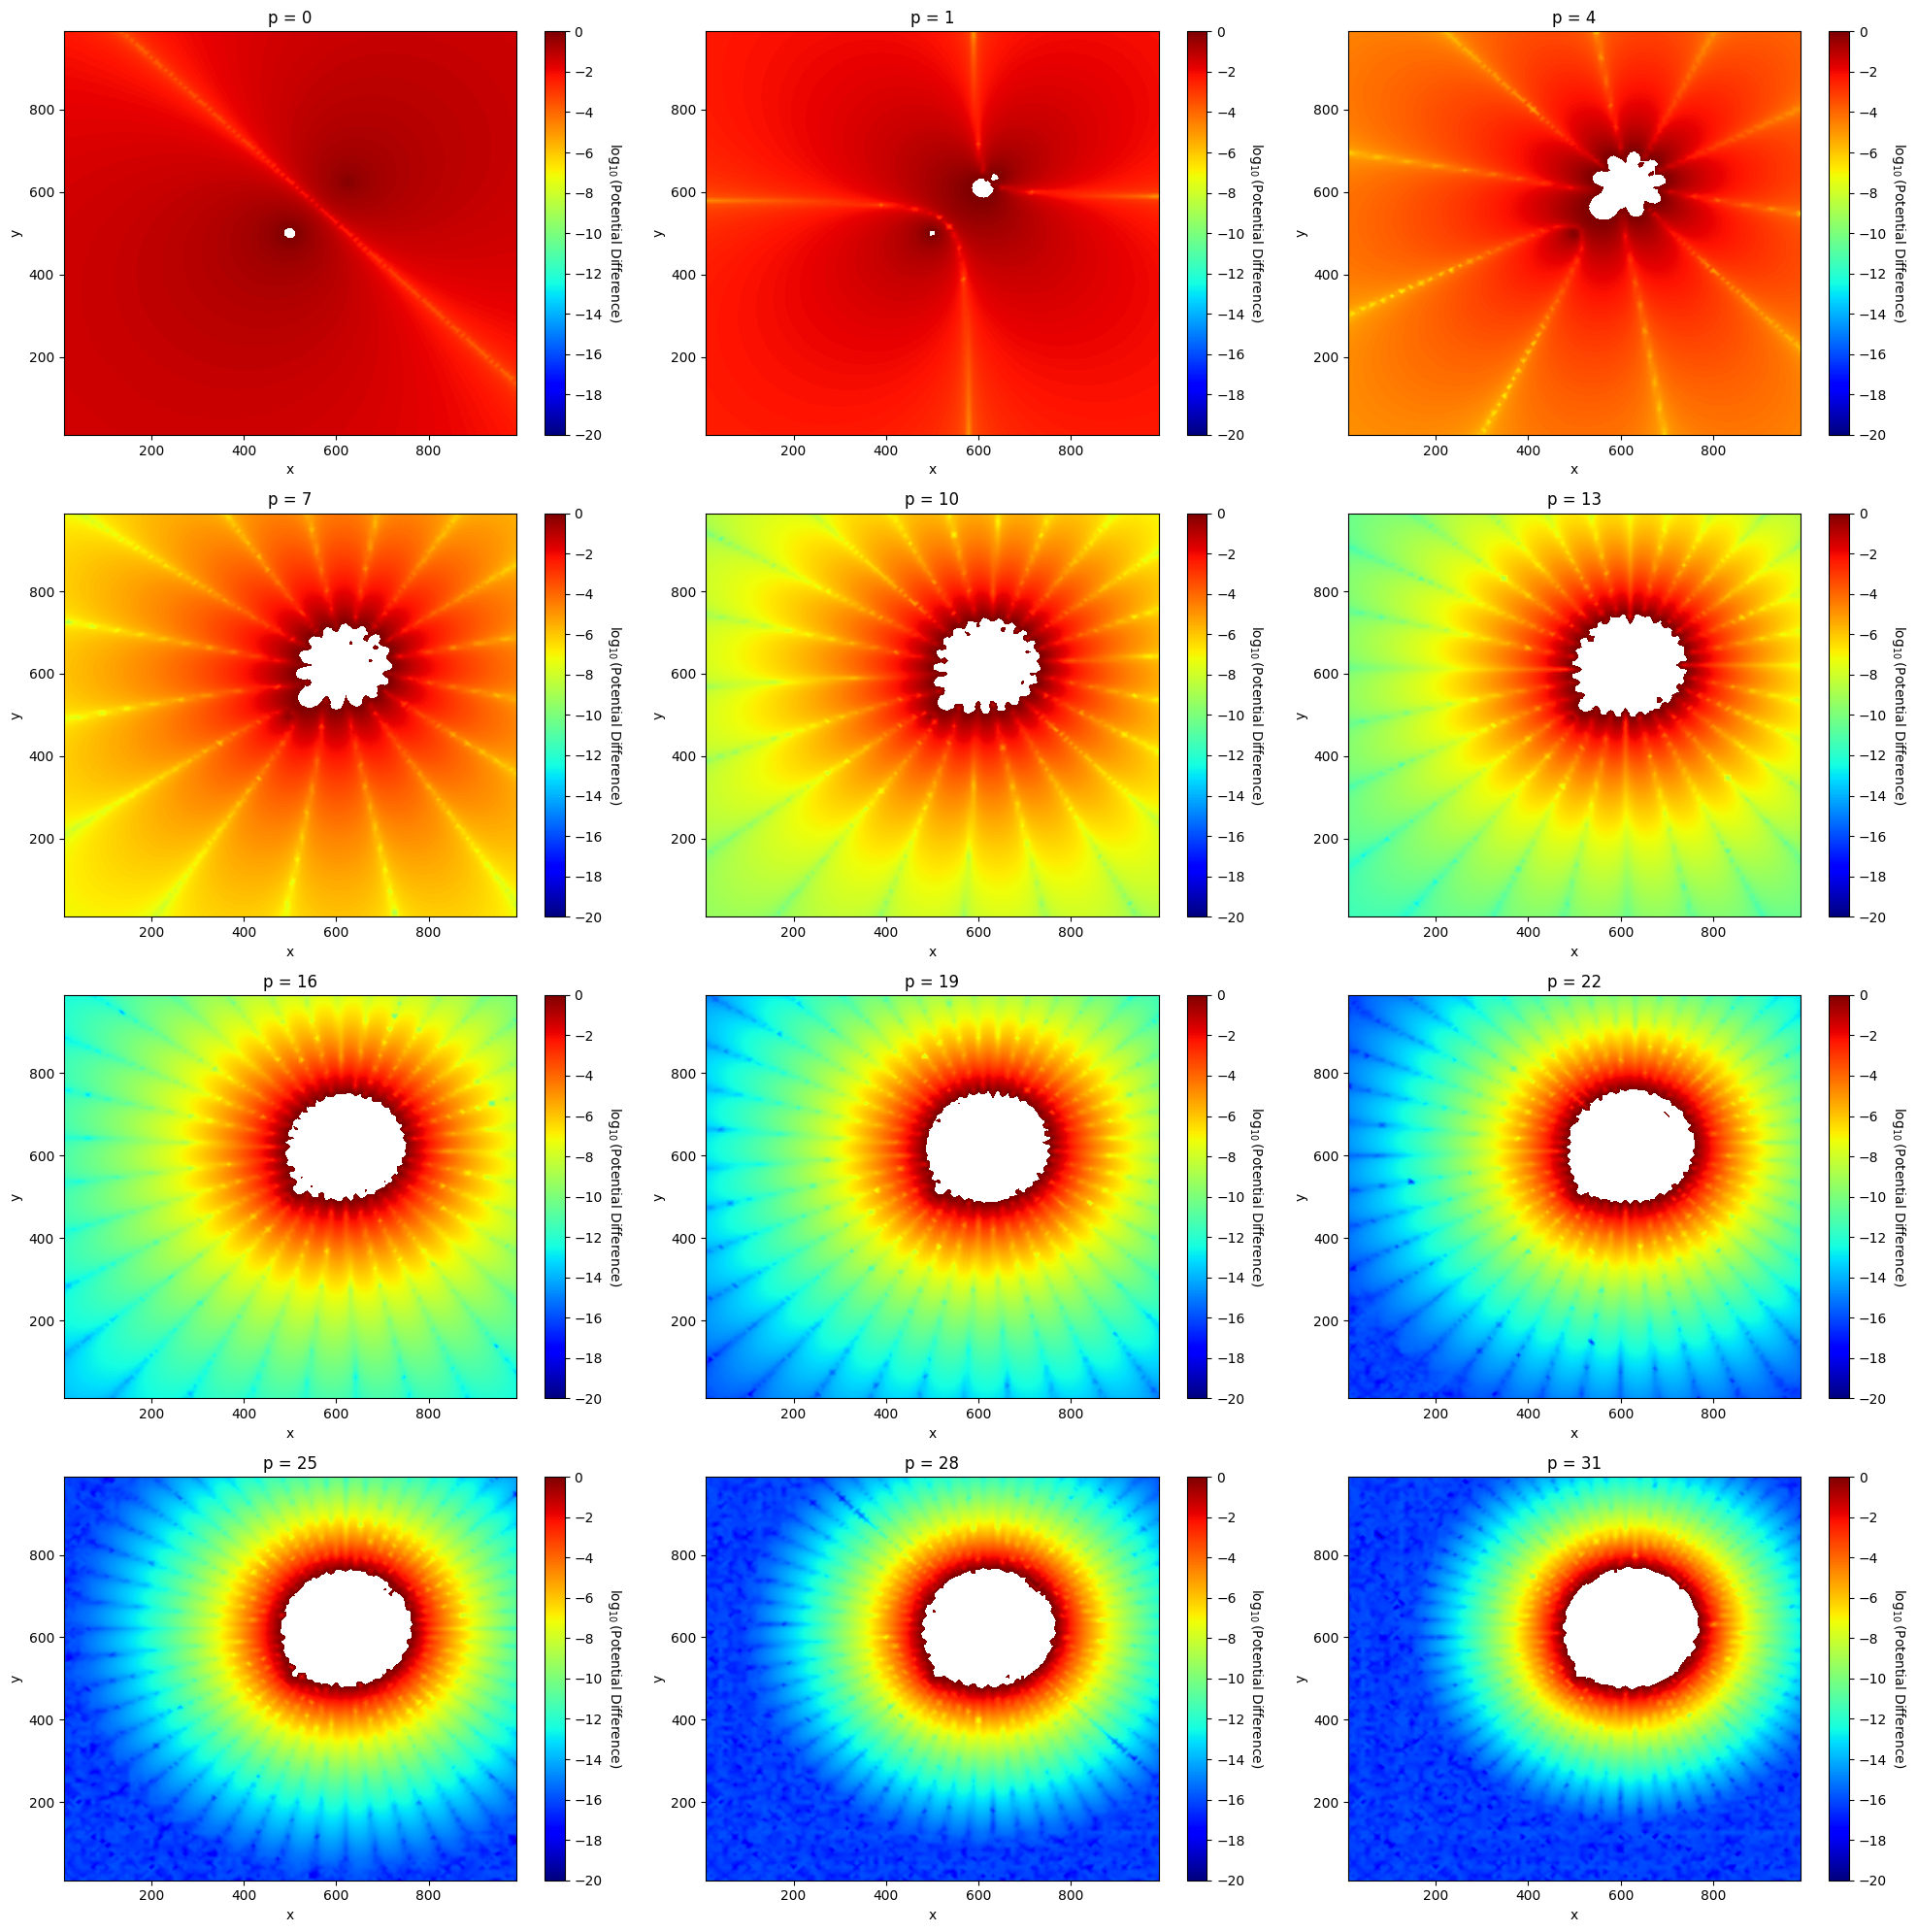

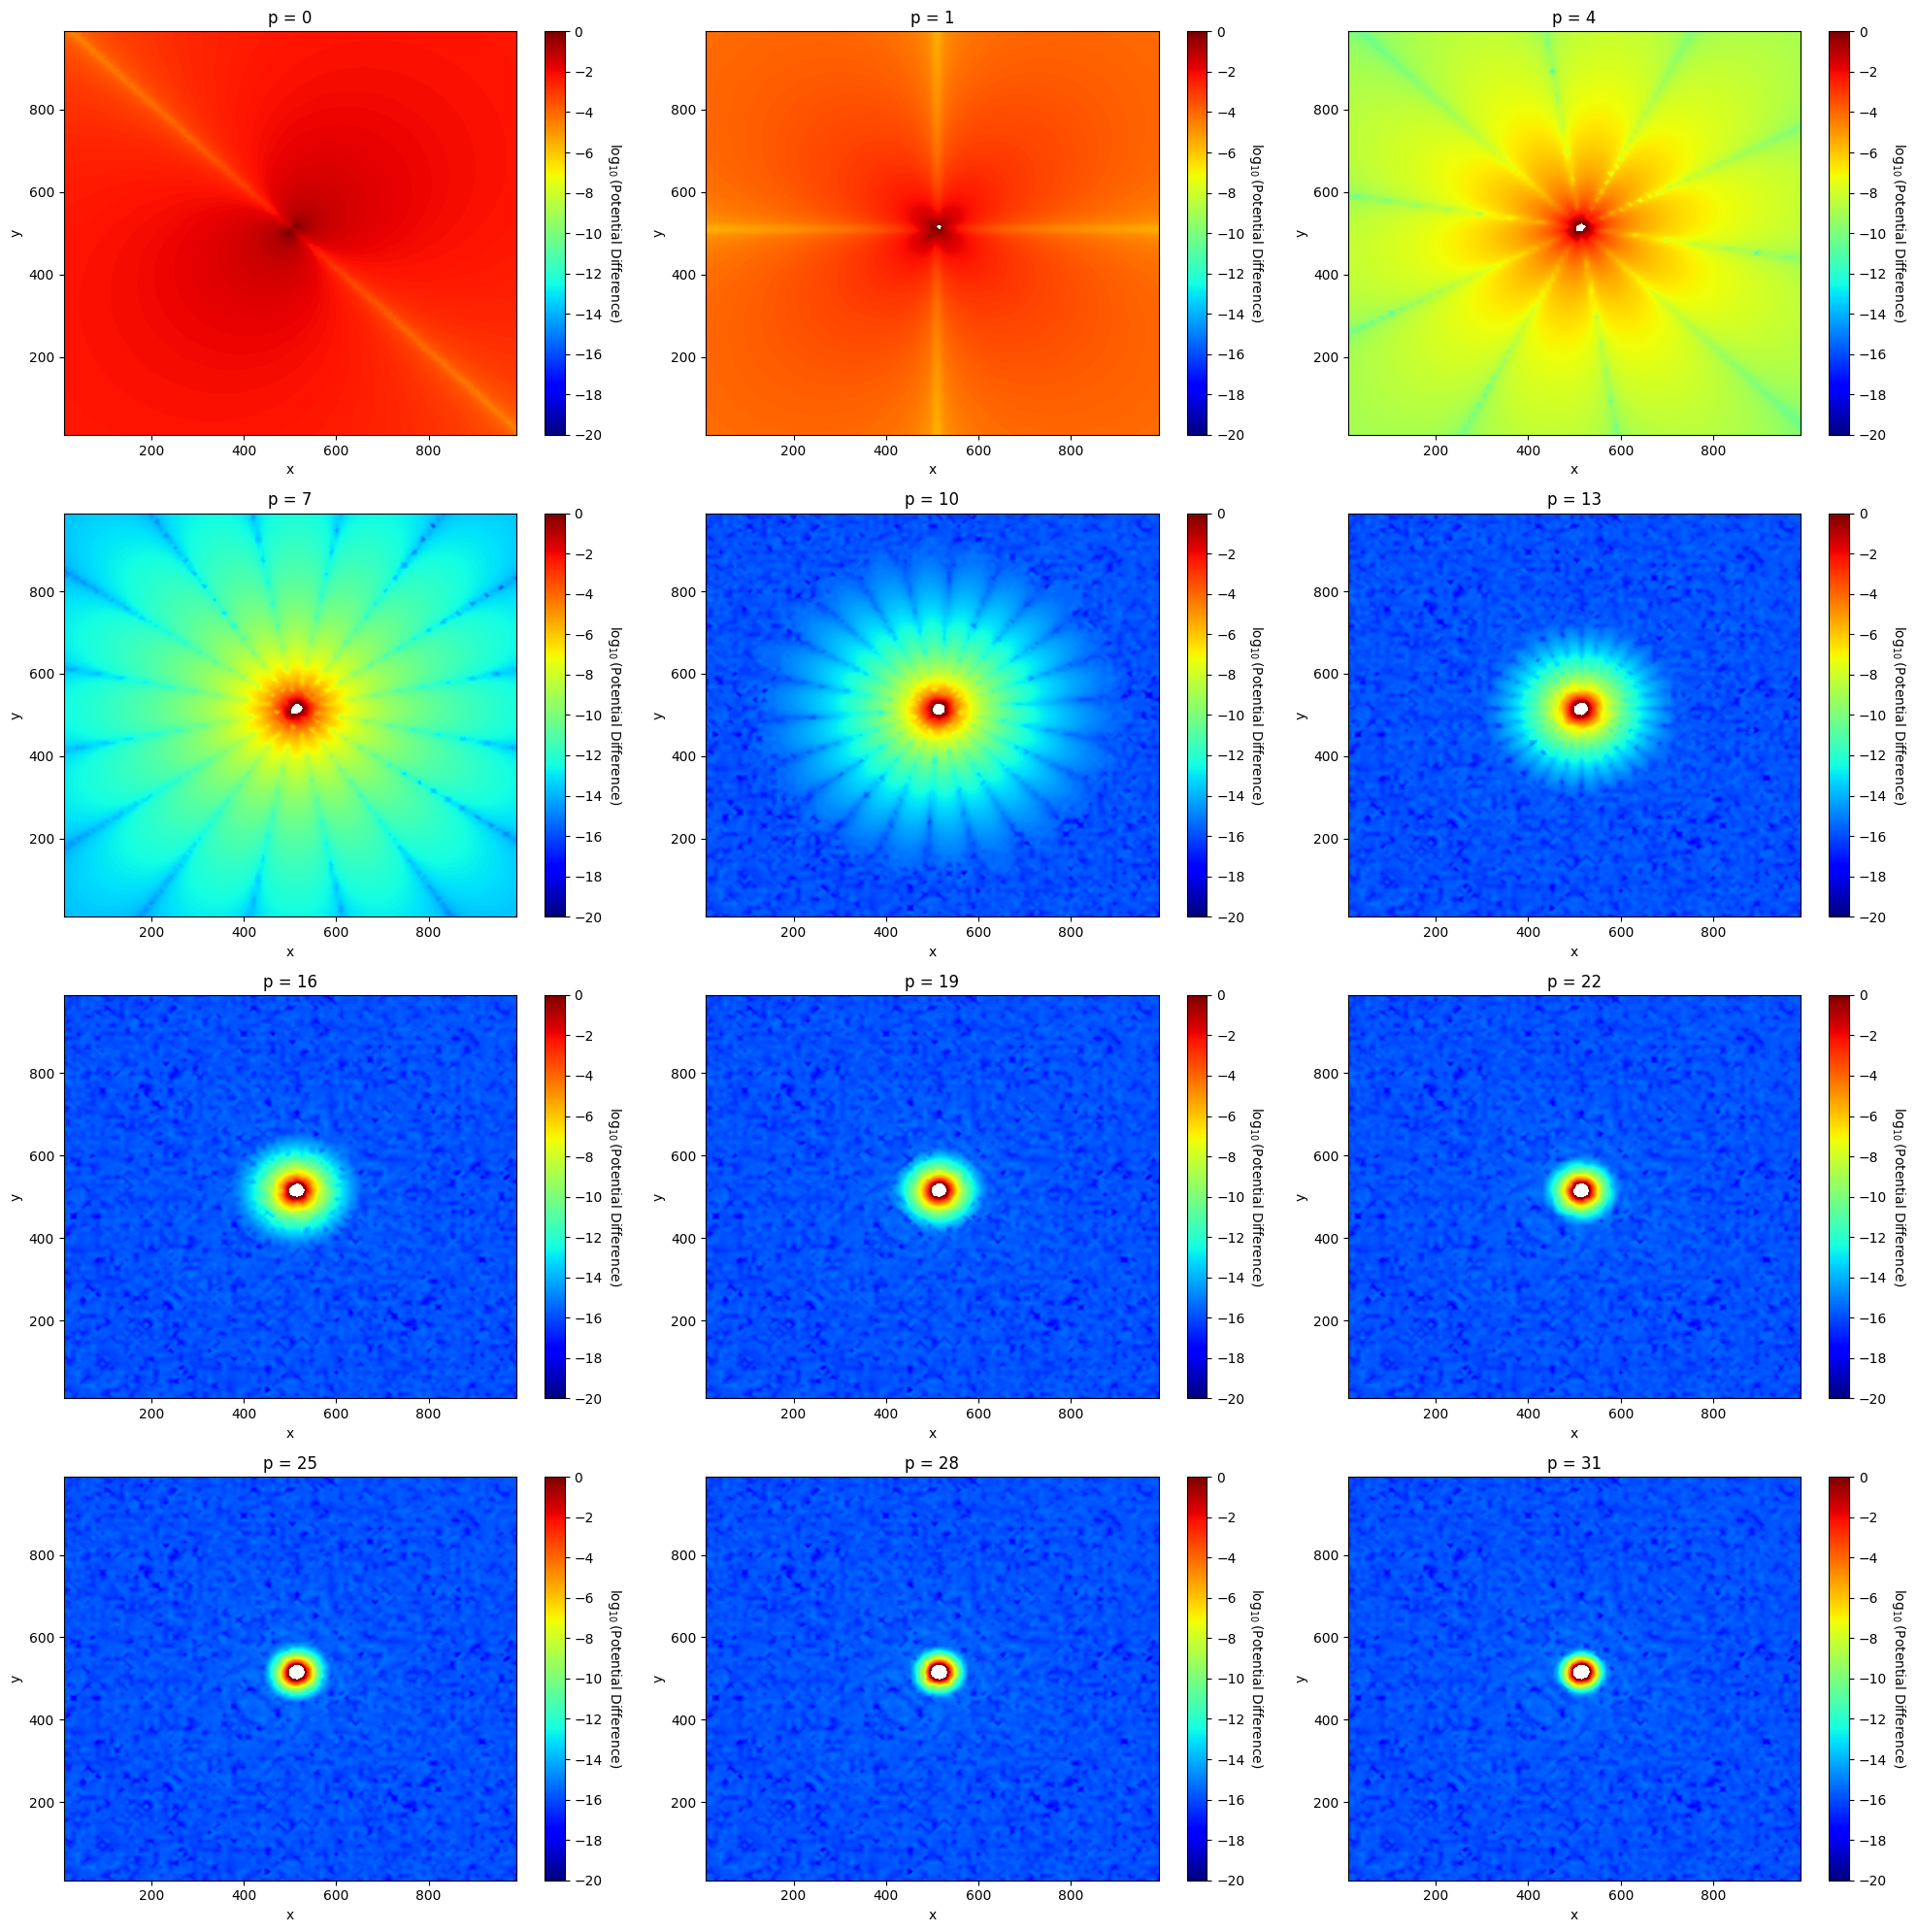

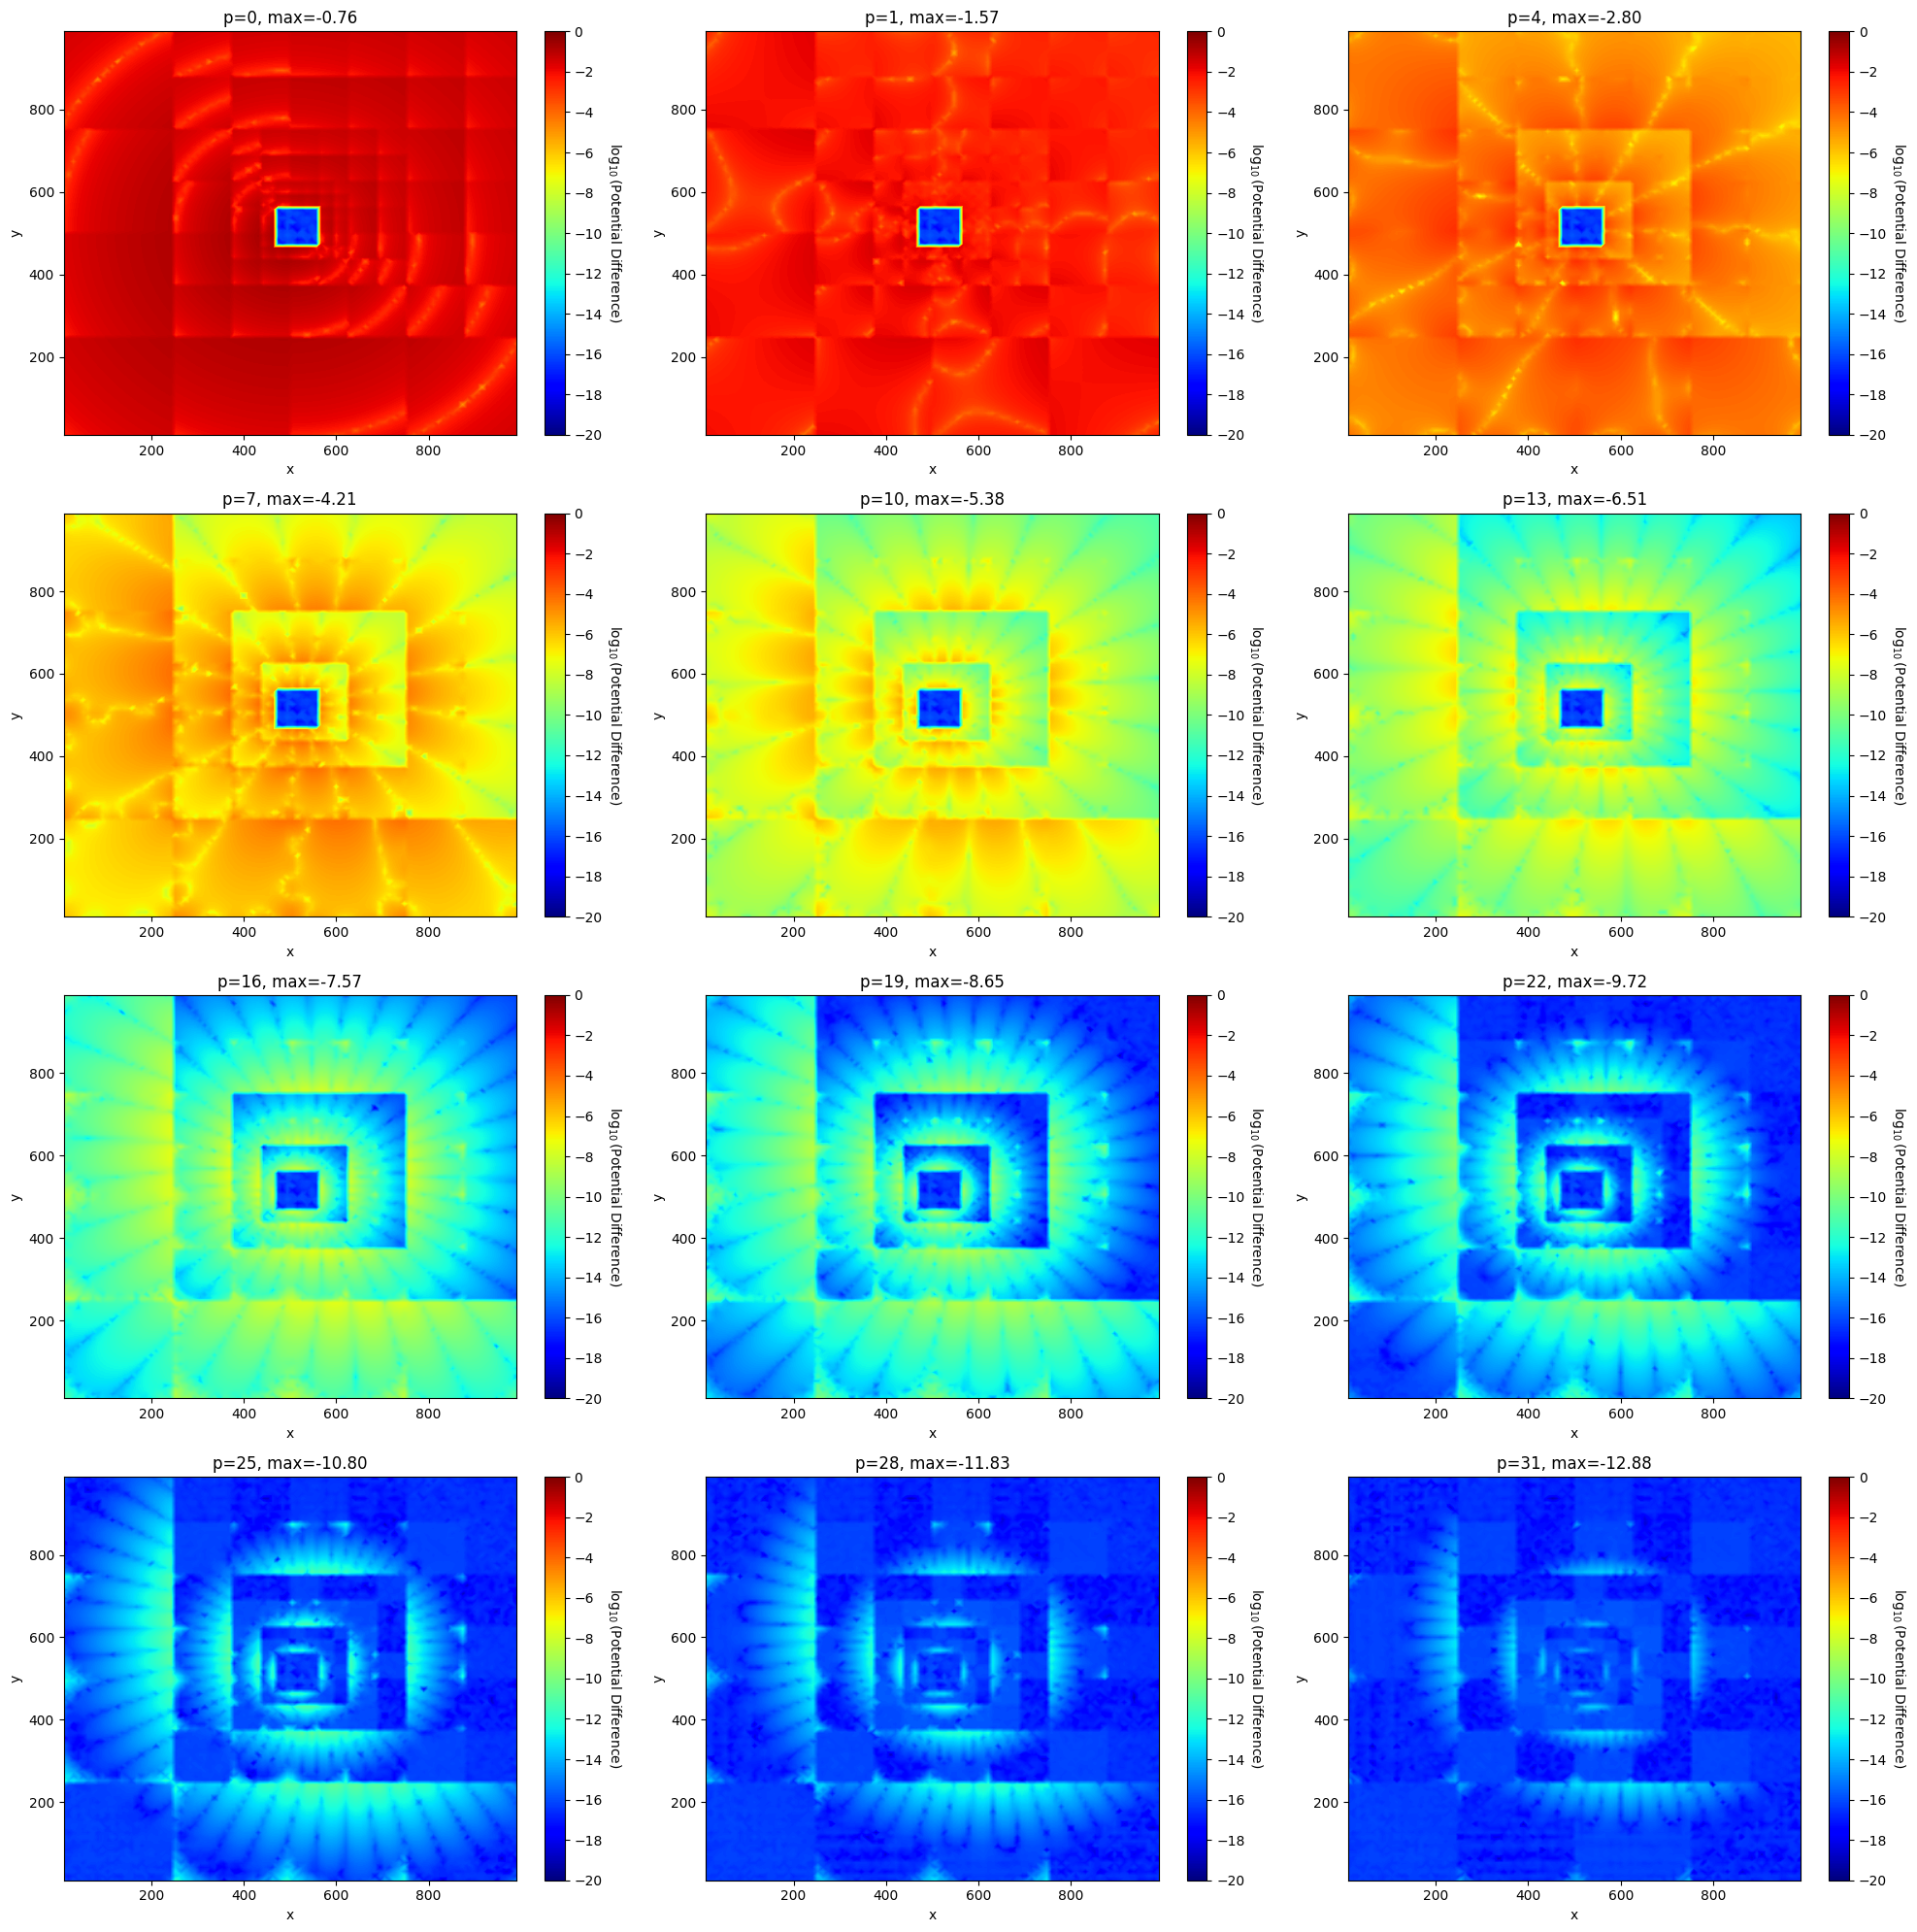

In [36]:
mpe_high_errors_fig, mpe_high_errors_axs = plt.subplots(4,3)
mpe_low_errors_fig, mpe_low_errors_axs = plt.subplots(4,3)
fmm_errors_fig, fmm_errors_axs = plt.subplots(4,3)
analytic_results = util.calc_potential_results(analytic_particles, plotting=False)
i=0
for p in ([0] + list(range(1,34,3))):
    
    print("p=",p)
    expansion_order = p
    n_levels = 5
    fmm_particles = copy.deepcopy(initial_particles)
    fmm_simulation = FMM(box_size, fmm_particles, n_levels, p=expansion_order)
    fmm_results = fmm_simulation.run(plotting = False)
    log_fmm_analytic_diff_results = util.calc_log_relative_error_results(fmm_particles, analytic_particles, fig = fmm_errors_fig, ax = fmm_errors_axs[int(i/3),int(i%3)], z_range=[-20,0])
    log_fmm_analytic_diff_results.ax.set_title("p=" + str(p) + ", max=" + '{0:.2f}'.format(log_fmm_analytic_diff_results.max))
    
    mpe_high_particles = copy.deepcopy(initial_particles)
    mpe_high_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
    mpe_high_test = PointTesting(mpe_high_particles, mpe_high_meshbox)
    mpe_high_test.test_mpe()
    log_mpe_high_test_analytic_diff_results = util.calc_log_relative_error_results(mpe_high_particles, analytic_particles, fig = mpe_high_errors_fig, ax = mpe_high_errors_axs[int(i/3),int(i%3)], z_range=[-20,0], title = "p = " + str(p))

    mpe_low_particles = copy.deepcopy(initial_particles)
    mpe_low_meshbox = fmm_simulation.mesh.meshboxes[5][16][16]
    mpe_low_test = PointTesting(mpe_low_particles, mpe_low_meshbox)
    mpe_low_test.test_mpe()
    log_mpe_low_test_analytic_diff_results = util.calc_log_relative_error_results(mpe_low_particles, analytic_particles, fig = mpe_low_errors_fig, ax = mpe_low_errors_axs[int(i/3),int(i%3)], z_range=[-20,0], title = "p = " + str(p))
    i+=1
mpe_high_errors_fig.set_size_inches(20, 20)
mpe_high_errors_fig.tight_layout()
mpe_low_errors_fig.set_size_inches(20, 20)
mpe_low_errors_fig.tight_layout()
fmm_errors_fig.set_size_inches(20, 20)
fmm_errors_fig.tight_layout()

